In [2]:
from src.config import BLD
from src.config import SRC
import pandas as pd
import numpy as np

In [2]:
df_h=pd.read_stata("src/original_data/HHENDDAT_cf_W11.dta",convert_categoricals=False)
df_p=pd.read_stata("src/original_data/PENDDAT_cf_W11.dta",convert_categoricals=False)

In [281]:
df_p_R=pd.read_pickle("bld/PENDDAT_clean.pickle") #read the clean data


# FUNCTIONS FOR SCALING
## BIG FIVE

In [ ]:
#slower then filter, deleted
df.loc[:, df.columns.str.contains('_n_')] #select items negatively phrased items

In [268]:
df_p_R.columns

Index(['p_id', 'survey_year', 'survey_mon', 'sex', 'age', 'religiosity',
       'PA0100', 'PA0300', 'PA0800', 'PA0900',
       ...
       'eri_reward_b', 'eri_reward_c', 'eri_reward_d', 'b5_ext', 'b5_agree',
       'b5_consc', 'b5_neu', 'b5_open', 'eri_effort', 'eri_reward'],
      dtype='object', length=102)

In [42]:
""" def reverse_code_big5(df, negatively_phrased):
    for i in negatively_phrased:
        df[i] = 6 - df[i] #Subtrack 6 to reverse code(6-1(lowest)=5(highest))
    return df """

In [43]:
""" reverse_code_big5(df, df_p_R.filter(regex='_n_')) """

p_id  survey_year  survey_mon  sex   age  \
hh_id       wave                                                     
10000019.0  1.0   1.000002e+09         2007           5  2.0  36.0   
            1.0   1.000002e+09         2007           5  1.0  39.0   
            3.0   1.000002e+09         2009           3  2.0  38.0   
10000020.0  1.0   1.000002e+09         2007           4  1.0  66.0   
            1.0   1.000002e+09         2007           4  2.0  61.0   
...                        ...          ...         ...  ...   ...   
110002041.0 11.0  1.100020e+10         2017           5  1.0  29.0   
110002042.0 11.0  1.100020e+10         2017           5  1.0  48.0   
            11.0  1.100020e+10         2017           5  1.0  16.0   
110002045.0 11.0  1.100020e+10         2017           7  1.0  36.0   
110002057.0 11.0  1.100021e+10         2017           8  1.0  32.0   

                  religiosity  PA0100  PA0300  PA0800  PA0900  ...  job  \
hh_id       wave                                               ...        
10000019.0  1.0           2.0     8.0    10.0     8.0     6.0  ...  4.0   
            1.0           2.0     8.0     7.0     8.0     7.0  ...  4.0   
            3.0           NaN     9.0     7.0     8.0     7.0  ...  4.0   
10000020.0  1.0           NaN     8.0     5.0     4.0     3.0  ...  4.0   
            1.0           3.0     2.0     5.0     NaN     3.0  ...  2.0   
...                       ...     ...     ...     ...     ...  ...  ...   
110002041.0 11.0          2.0    10.0     4.0     8.0     5.0  ...  2.0   
110002042.0 11.0          3.0     1.0     5.0     8.0     2.0  ...  2.0   
            11.0          3.0    10.0     4.0     4.0     7.0  ...  2.0   
110002045.0 11.0          2.0     8.0     7.0     7.0     5.0  ...  2.0   
110002057.0 11.0          3.0     7.0     7.0     5.0     4.0  ...  4.0   

                  educ_casmin  net_income  gross_income  job_hours  salary  \
hh_id       wave                                                             
10000019.0  1.0           4.0         NaN           NaN        NaN     NaN   
            1.0           7.0      3000.0           NaN        NaN     NaN   
            3.0           4.0         NaN           NaN        NaN     2.0   
10000020.0  1.0           4.0         NaN           NaN        NaN     NaN   
            1.0           5.0         NaN           NaN        NaN     NaN   
...                       ...         ...           ...        ...     ...   
110002041.0 11.0          1.0         NaN           NaN        NaN     2.0   
110002042.0 11.0          1.0         NaN           NaN        NaN     2.0   
            11.0          2.0         NaN           NaN        NaN     2.0   
110002045.0 11.0          6.0         NaN           NaN        NaN     2.0   
110002057.0 11.0          7.0         NaN           NaN        NaN     2.0   

                  unemp  isei1  isei2  migration  
hh_id       wave                                  
10000019.0  1.0     NaN    NaN    NaN        1.0  
            1.0     NaN   59.0    NaN        1.0  
            3.0     2.0    NaN    NaN        1.0  
10000020.0  1.0     NaN    NaN    NaN        NaN  
            1.0     NaN    NaN    NaN        2.0  
...                 ...    ...    ...        ...  
110002041.0 11.0    1.0    NaN    NaN        2.0  
110002042.0 11.0    1.0    NaN    NaN        2.0  
            11.0    1.0    NaN    NaN        2.0  
110002045.0 11.0    1.0    NaN    NaN        2.0  
110002057.0 11.0    2.0    NaN    NaN        2.0  

[25474 rows x 85 columns]

In [62]:
"b5_ext_n_a" in df_p_R.filter(regex='_n_') #works

False

In [66]:
print("b5_ext_n_a" in df_p_R.filter(regex='_n_'))

True


In [76]:
if ("b5_ext_n_a" in df_p_R.filter(regex='_n_')) == True :
    print("y")

y


In [233]:
def reverse_code_big5(df):
    for i in df:
        if (f"{i}" in df.filter(regex='_neg')) == True :
            new_column_name = i.replace("_neg", "")
            df[new_column_name] = 6 - df[i] #Subtrack 6 to reverse code(6-1(lowest)=5(highest))
    return df

In [234]:
df_p_R = reverse_code_big5(df_p_R)

In [198]:
df_p_R["b5_ext"] = df_p_R[df_p_R.columns.drop(list(df_p_R.filter(regex="_n")))].filter(regex='b5_ext').mean(axis=1) #creates the average as a new column

In [236]:
#BUNA FONKSİYON YAZILIR MI? Data standart bir şey?
def average_big5(df):
    facets = ["ext", "agree", "consc", "neu", "open"]
    for i in facets:
        df[f"b5_{i}"] = df[df.columns.drop(list(df.filter(regex="_neg")))].filter(regex=f"b5_{i}").mean(axis=1)
    return df

In [256]:
df_p_R["b5_ext_a"].mean()

3.117224880382775

In [251]:
(df_p_R["b5_ext"].max() + 1) - 2

4.0

## EFFORT - REWARD

In [273]:
df_p_R["eri_reward"].mean()

2.706807310630399

## GENDER ROLE

In [282]:
def average_genrole(df):
    df["genrole_traditional"] = df.filter(regex="traditional").mean(axis=1)
    return df

In [286]:
df_p_R.columns

Index(['p_id', 'survey_year', 'survey_mon', 'sex', 'age', 'religiosity',
       'PA0100', 'PA0300', 'PA0800', 'PA0900',
       ...
       'eri_reward_c', 'eri_reward_d', 'b5_ext', 'b5_agree', 'b5_consc',
       'b5_neu', 'b5_open', 'eri_effort', 'eri_reward', 'genrole_traditional'],
      dtype='object', length=103)

# CSV OLD CODE


In [ ]:
# Aslında bu file formatında yazmaya çalıştım ama nedense run etmiyor. Sende ediyor mu??
# Gerçi bunu projeye koymasak da olur --ays
"""
This file contains code to create list of
variables in PPENDDAT dataset.
"""
import numpy as np
import pandas as pd

penddat = pd.read_stata("../../original_data/PENDDAT_cf_W11.dta")
np.savetxt("penddat_renaming.csv", list(penddat), delimiter=" ;", fmt="% s")

# SUMMARY STATS

In [2]:
from src.config import BLD
from src.config import SRC
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
df_h=pd.read_stata("src/original_data/HHENDDAT_cf_W11.dta",convert_categoricals=False)

In [4]:
df_p=pd.read_stata("src/original_data/PENDDAT_cf_W11.dta",convert_categoricals=False)

In [5]:
df_h_c = pd.read_pickle(BLD/"HHENDDAT_clean.pickle")

In [6]:
df_p_c = pd.read_pickle(BLD/"PENDDAT_clean.pickle")

In [7]:
x = df_p_c.groupby("wave").count()["p_id"].reset_index()["wave"]
y = df_p_c.groupby("wave").count()["p_id"].reset_index()["p_id"]

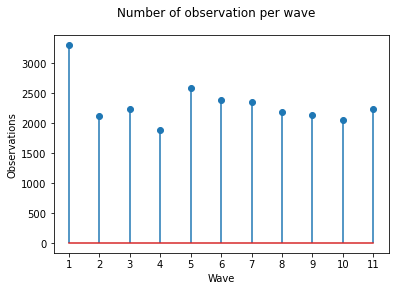

In [15]:
# number of observation per wave
plt.stem(x,y)
plt.xticks(x)
plt.suptitle('Number of observation per wave')
plt.xlabel('Wave')
plt.ylabel('Observations')
plt.show()

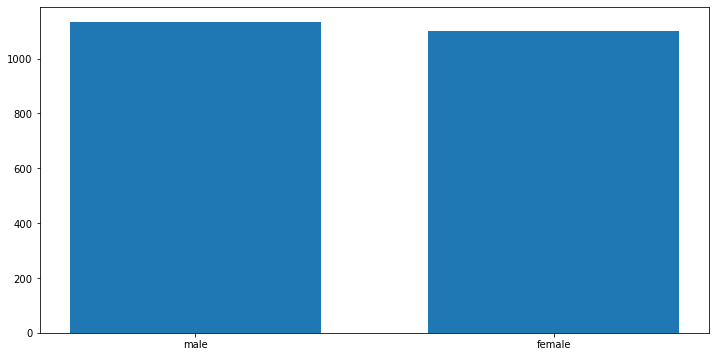

In [16]:
x=df_p_c.iloc[df_p_c.index.get_level_values('wave') == 11].groupby("sex").count()["p_id"].reset_index()["sex"]
y=df_p_c.iloc[df_p_c.index.get_level_values('wave') == 11].groupby("sex").count()["p_id"].reset_index()["p_id"]
fig, ax = plt.subplots(figsize=(12,6))
#ax.bar(pd.Categorical(df_p_c.sex).rename_categories({1.0:"male",2.0:"female"}))
ax.bar(x,y,width=0.7)
plt.xticks([1,2],["male","female"])

plt.show()

In [31]:

x=df_p_c.iloc[df_p_c.index.get_level_values('wave') == 11]

SyntaxError: invalid syntax (544169910.py, line 2)